In [202]:
#Check csv file name, check max_lags(should be less than half of train /half of full) , check train,test split, check seasonality
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("vehicle_data.csv") #Change this based on csv file received
df.head
#df['date'] = df['date'].astype(str)

# Strip any leading/trailing whitespace
#df['date'] = df['date'].str.strip()

# Convert the 'date' column to datetime, coercing errors
#df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any 'NaT' values that failed to convert
#invalid_dates = df[df['date'].isna()]
#if not invalid_dates.empty:
    #print("Entries that could not be converted:")
    #print(invalid_dates)

# Verify the conversion
print(df.dtypes)
print(df.head())


Minute         int64
cars           int64
Buses          int64
Motorcycles    int64
Bicycles       int64
dtype: object
   Minute  cars  Buses  Motorcycles  Bicycles
0       1    59      1           15         0
1       2    30      2           10         0
2       3    53      1           14         0
3       4    29      5            7         0
4       5    23      3           11         1


In [203]:
df.head()

,Minute,cars,Buses,Motorcycles,Bicycles
0,1,59,1,15,0
1,2,30,2,10,0
2,3,53,1,14,0
3,4,29,5,7,0
4,5,23,3,11,1


In [204]:
#ts=df['cars'].resample('D').sum or .mean
#we may choose to resample the data per day or weekly, here there is no minutes rule so we have to ensure the data coming in is already
#minutes wise

<Axes: >

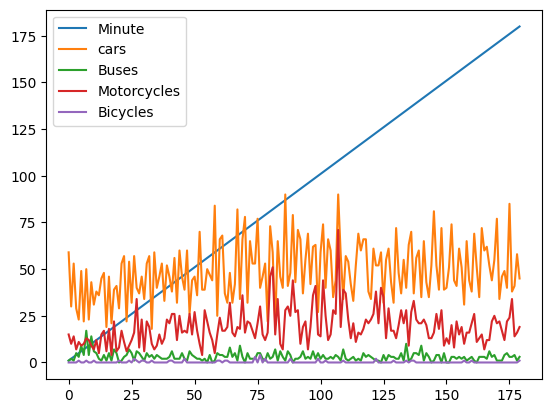

In [205]:
#df.plot(x='date',y='cars')
df.plot()


**Stationarity check: we can do ACF and PCAF checks here**

In [206]:
import statsmodels.api as sm
print(df.dtypes)


Minute         int64
cars           int64
Buses          int64
Motorcycles    int64
Bicycles       int64
dtype: object


In [207]:
print(len(df))

180


In [208]:
import math
lengthy= math.floor(0.7*len(df))
train = df[:lengthy] #Change these based on size of original CSV file, try a 70-30% split
test= df[lengthy:]

In [209]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



print(train.dtypes)
print(train.head())

Minute         int64
cars           int64
Buses          int64
Motorcycles    int64
Bicycles       int64
dtype: object
   Minute  cars  Buses  Motorcycles  Bicycles
0       1    59      1           15         0
1       2    30      2           10         0
2       3    53      1           14         0
3       4    29      5            7         0
4       5    23      3           11         1


ACF Values: [ 1.00000000e+00 -1.65219874e-01  4.37610028e-02  4.69413171e-01
 -2.18071662e-01  1.99736447e-01  3.01282937e-01 -9.82893677e-02
  2.34114435e-01  1.44179474e-01 -9.64333222e-03  2.42824665e-01
  4.09332140e-02  2.01788888e-02  2.60618887e-01  8.47626839e-02
  7.04413646e-02  2.07750522e-01  2.63477807e-02 -1.16577115e-02
  2.08703402e-01  2.77699797e-04  5.95976583e-02  1.56447863e-01
 -8.09175678e-02  8.75528412e-02  1.26500126e-01 -7.42363164e-02
  1.78429070e-01 -1.96555734e-03  9.89832663e-03  1.84233291e-01
 -4.11462191e-02  1.97253115e-02  1.38942995e-01 -4.32411435e-02
  3.39624440e-02  6.58289598e-02 -3.91254437e-02 -2.78562781e-02
  7.61078491e-02 -4.87810947e-02 -1.68026229e-02  2.48178346e-02
 -4.36521806e-02 -8.61213348e-03  4.71512462e-02 -2.02295572e-02
 -7.68067604e-03  8.37754943e-02 -1.04268099e-01  2.46622122e-02
 -1.05056395e-01 -1.12722327e-01  1.71418857e-02 -6.61078491e-02
 -2.02884047e-02 -3.10488097e-02 -6.38829048e-02 -4.83260036e-02
 -1.25453638e

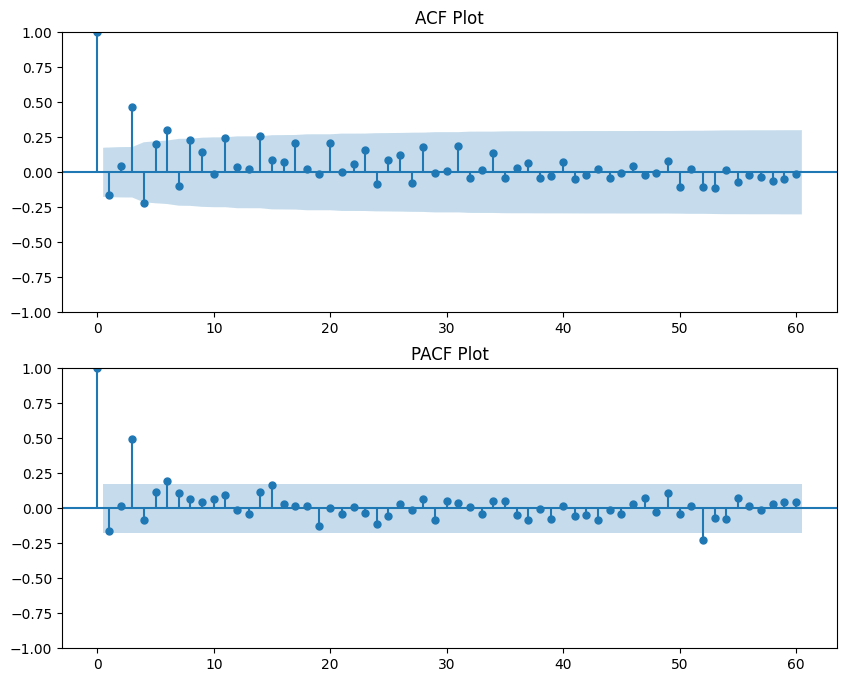

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

# Assuming train is your DataFrame
max_lags = 60 # Set to the maximum number of lags that works

# Calculate ACF and PACF values
acf_values = acf(train["cars"], nlags=max_lags)
pacf_values = pacf(train["cars"], nlags=max_lags)

# Store in variables
acf_original = acf_values
pacf_original = pacf_values

# Print the ACF and PACF values
print("ACF Values:", acf_original)
print("PACF Values:", pacf_original)

# Plot ACF with the current number of lags
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train["cars"], lags=max_lags, ax=ax[0])
ax[0].set_title('ACF Plot')

# Plot PACF with the current number of lags
plot_pacf(train["cars"], lags=max_lags, ax=ax[1])
ax[1].set_title('PACF Plot')

plt.show()

In [211]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train["cars"])
print(f'p-value: {adf_test[1]}')

p-value: 0.08992765810991843


In [212]:
!pip install pmdarima

In [213]:

import pmdarima as pm
#auto_arima = pm.auto_arima(train["cars"], stepwise=False, seasonal=False)
#auto_arima
auto_arima = pm.auto_arima(train["cars"],
                              start_p=0, max_p=5,
                              start_q=0, max_q=5,
                              seasonal=False, # Set True if you expect seasonality
                              stepwise=True,
                              trace=True)
auto_arima


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1146.539, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1095.946, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1144.539, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1022.820, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1024.675, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1010.459, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.76 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1000.705, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1015.983, Time=1.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1012.003, Time=1.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=5.73 s

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [214]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -494.353
Date:                Wed, 21 Aug 2024   AIC                           1000.705
Time:                        16:09:11   BIC                           1017.627
Sample:                             0   HQIC                          1007.579
                                - 125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3850      0.126      3.045      0.002       0.137       0.633
ar.L1         -1.0000      0.147     -6.799      0.000      -1.288      -0.712
ar.L2         -0.5193      0.092     -5.628      0.000      -0.700      -0.338
ma.L1         -0.3281      0.150     -2.183      0.029      -0.623      -0.033
ma.L2         -0.5879      0.167     -3.525      0.000      -0.915      -0.261
sigma2       164.9363     22.002      7.496      0.000     121.813     208.060
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.50   Prob(JB):                         0.89
Heteroskedasticity (H):               1.57   Skew:                             0.10
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

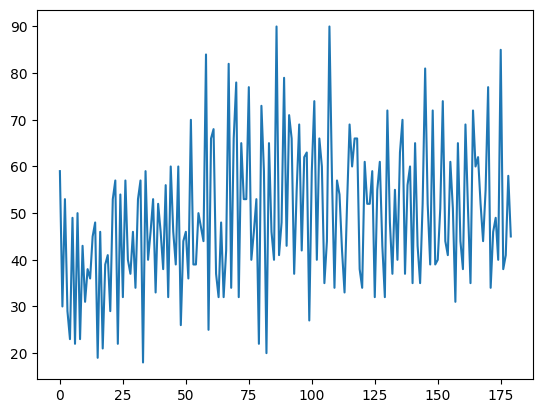

In [215]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

df["cars"].plot()

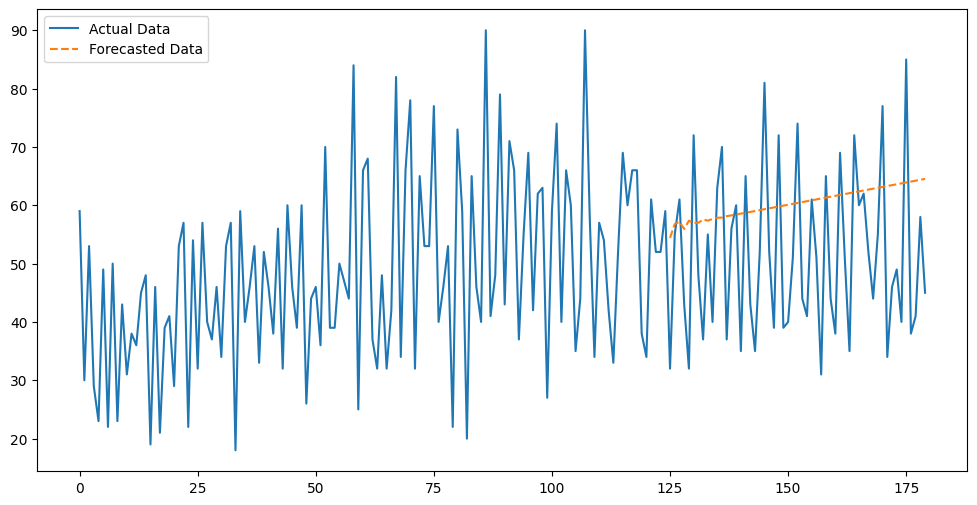

In [217]:
import matplotlib.pyplot as plt


# Ensure the forecast is aligned with the test data
forecast_test_auto = auto_arima.predict(n_periods=len(test))

# Create a new series that combines the train data with the forecast
df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto)

# Plot the actual data and the forecasted data
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df["cars"], label='Actual Data')

# Plot forecasted data
plt.plot(df['forecast_auto'], label='Forecasted Data', linestyle='--')

plt.legend()
plt.show()


In [218]:
#def predict_future(data, start_index, periods, model):
    # Select the data up to the start index for model training
    #train_data = data[:start_index]

    # Fit the ARIMA model to the selected training data
    #model.fit(train_data)

    #Predict for the number of periods specified
    #future_forecast = model.predict(n_periods=periods)

    #return future_forecast

    #-------

#def predict_future(data, start_index, periods_to_predict, model):

def predict_future(data, start_index, periods, model):
    """
    Predict future values using the ARIMA model and plot the results.

    Parameters:
        data (pd.Series): The historical time series data.
        start_index (int): The index to start forecasting from.
        periods (int): The number of periods to forecast.
        model: The ARIMA model.

    Returns:
        pd.Series: Forecasted values.
    """
    # Select the data up to the start index for model training
    train_data = data[:start_index]

    # Fit the ARIMA model to the selected training data
    #model.fit(train_data)

    # Predict for the number of periods specified
    future_forecast = model.predict(n_periods=periods)

    # Prepare the data for plotting
    forecast_index = list(range(start_index, start_index + periods))
    forecast_series = pd.Series(future_forecast, index=forecast_index)

    # Plot the actual data and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')

    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return future_forecast

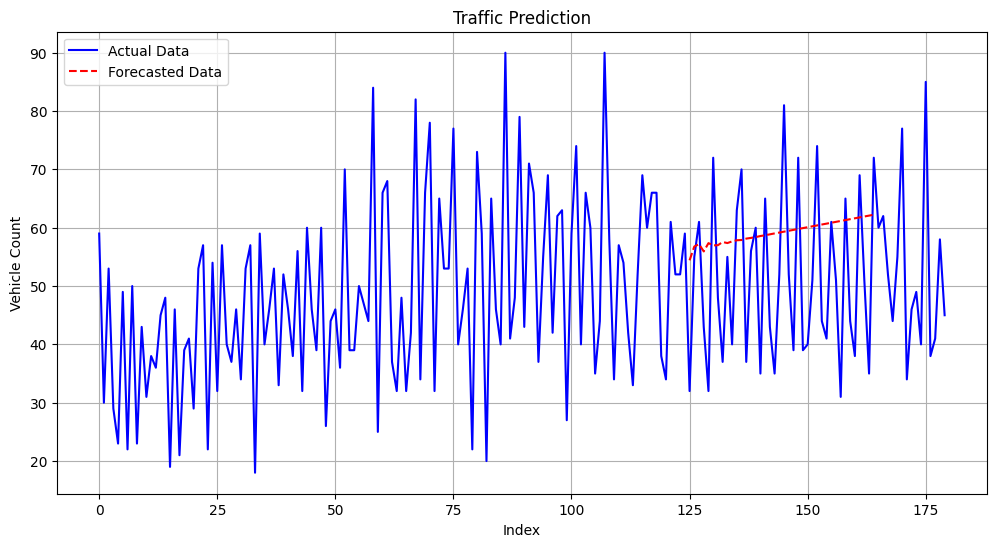

Predictions from index 65 for the next 100 periods:
125    54.413189
126    56.780937
127    57.180382
128    55.936274
129    57.357860
         ...    
220    70.786668
221    70.939482
222    71.092295
223    71.245108
224    71.397921
Length: 100, dtype: float64


In [219]:
#start_index = 50  # Replace with your desired start index
#periods_to_predict = 30  # Number of periods to predict into the future

# Assuming 'auto_arima' is the trained model and 'df["cars"]' is your data
#future_predictions = predict_future(df["cars"], start_index, periods_to_predict, auto_arima)

#print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
#print(future_predictions)

#----
#future_forecast = predict_future(df['cars'], start_index, periods_to_predict, auto_arima)

#print(f"Forecasted values:\n{future_forecast}")






start_index = 65 # Example start index
periods_to_predict = 100 # Number of periods to forecast
future_predictions = predict_future(df['cars'], start_index, periods_to_predict, auto_arima)

print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)


In [220]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["cars"], order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   cars   No. Observations:                  180
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -733.127
Date:                Wed, 21 Aug 2024   AIC                           1472.253
Time:                        16:09:53   BIC                           1481.816
Sample:                             0   HQIC                          1476.131
                                - 180                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9352      0.062    -15.015      0.000      -1.057      -0.813
ar.L2         -0.6722      0.064    -10.456      0.000      -0.798      -0.546
sigma2       209.4880     22.309      9.390      0.0

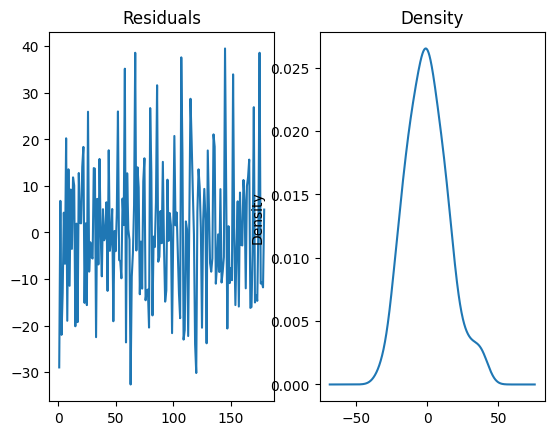

In [221]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]  #model_fit is model.fit for that vehicle , and that order which has been chosen
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

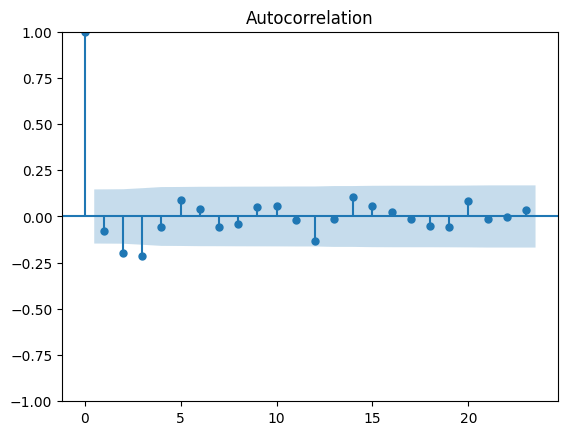

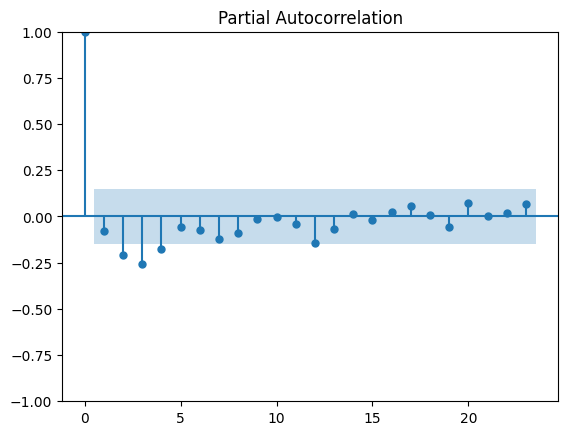

In [222]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

<Axes: >

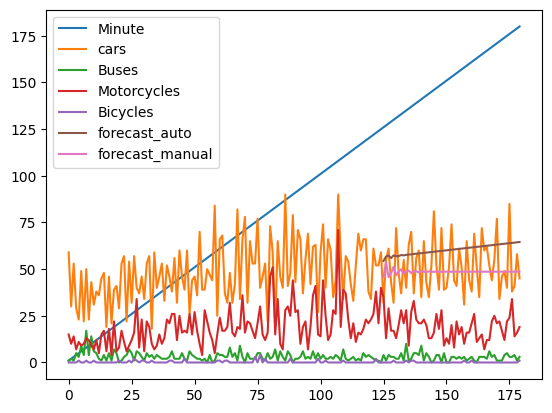

In [223]:
forecast_test = model_fit.forecast(len(test))

df['forecast_manual'] = [None]*len(train) + list(forecast_test)

df.plot()

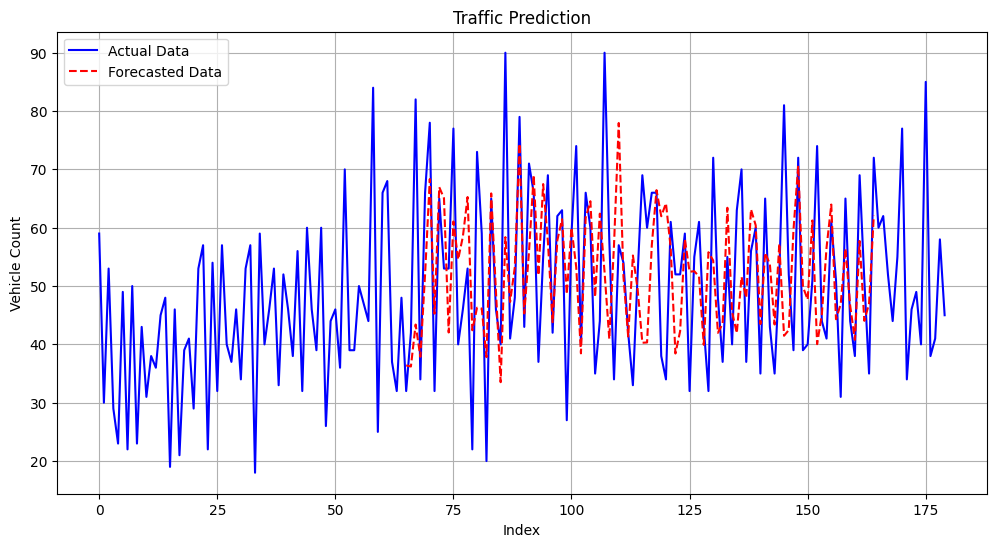

Predictions from index 65 for the next 100 periods:
0       0.000000
1      58.981661
2      46.207779
3      50.983667
4      35.984594
         ...    
175    46.400222
176    48.965824
177    51.706170
178    69.786765
179    40.085152
Name: predicted_mean, Length: 180, dtype: float64


In [224]:
start_index = 65 # Example start index
periods_to_predict = 100 # Number of periods to forecast
future_predictions = predict_future(df['cars'], start_index, periods_to_predict, model_fit)

print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

'''def predict_future_1(data, start_index, periods, model):
  # Select the data up to the start index for model training
    train_data = data[:start_index]

    # Predict for the number of periods specified
    future_forecast = model.predict(n_periods=periods)

    # Prepare the forecast index
    forecast_index = list(range(start_index, start_index + periods))

    # Create a forecast series
    forecast_series = pd.Series(future_forecast, index=forecast_index)

    # Plot the actual data and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')

    # Extend the x-axis to include forecasted periods
    plt.xlim(0, max(forecast_series.index))

    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast_series'''
def predict_future_1(data, start_index, periods, model):
    """
    Predict future values using the ARIMA model and plot the results.

    Parameters:
        data (pd.Series): The historical time series data.
        start_index (int): The index to start forecasting from.
        periods (int): The number of periods to forecast.
        model: The ARIMA model.

    Returns:
        pd.Series: Forecasted values.
    """
# Predict for the number of periods specified
    future_forecast = model.get_forecast(steps=periods)

    # Get forecast values
    forecast_series = future_forecast.predicted_mean

    # Create the forecast index starting immediately after the last data point
    forecast_index = list(range(start_index, start_index + periods))

    # Adjust the forecast series index
    forecast_series.index = forecast_index

    # Plot the actual data
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')

    # Plot the forecasted data
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')

    # Extend the x-axis to include the forecasted periods
    plt.xlim(0, start_index + periods)

    # Set y-axis to accommodate both actual and forecasted values
    min_y = min(data.min(), forecast_series.min())
    max_y = max(data.max(), forecast_series.max())
    plt.ylim(min_y - 0.1 * abs(min_y), max_y + 0.1 * abs(max_y))

    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast_series





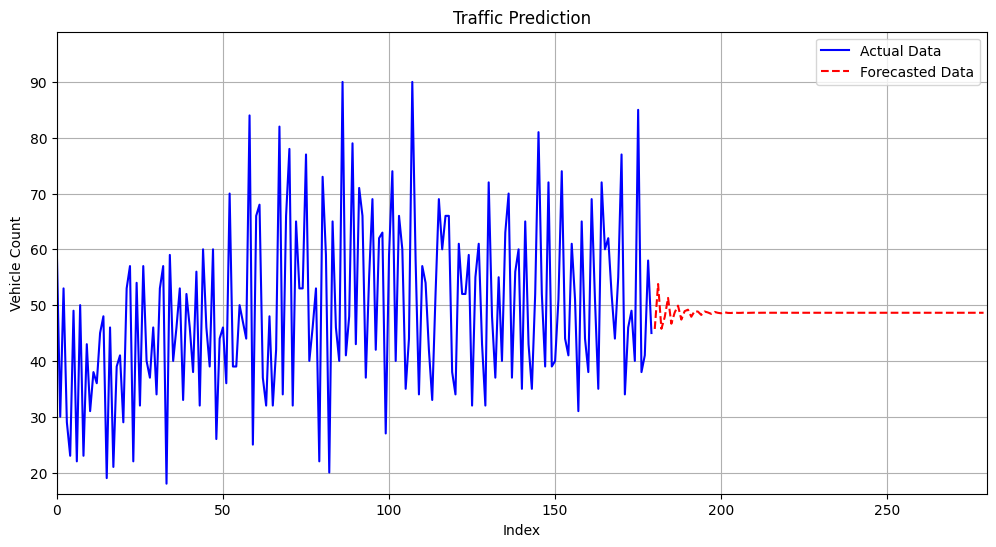

Predictions from index 180 for the next 100 periods:
180    45.730515
181    53.785651
182    45.761492
183    47.851163
184    51.290573
         ...    
275    48.631558
276    48.631558
277    48.631558
278    48.631558
279    48.631558
Name: predicted_mean, Length: 100, dtype: float64


In [226]:
start_index = len(df) # Example start index
periods_to_predict = 100 # Number of periods to forecast
future_predictions = predict_future_1(df['cars'], start_index, periods_to_predict, model_fit)

print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)

In [227]:
def predict_future_test(data, start_index, periods, model):
    """
    Predict future values using the ARIMA model and plot the results.

    Parameters:
        data (pd.Series): The historical time series data.
        start_index (int): The index to start forecasting from.
        periods (int): The number of periods to forecast.
        model: The fitted ARIMA model.

    Returns:
        pd.Series: Forecasted values.
    """
    # Predict for the number of periods specified
    #AGAIN EDITING FOR HOLT WINTER
    future_forecast = model.get_forecast(steps=periods) #COMMENTED FOR HOLT WINTER
    #forecast_series = model.forecast(steps=periods)

    # Get forecast values and confidence intervals
    forecast_series = future_forecast.predicted_mean #COMMENTED FOR HOLT WINTER
    conf_int = future_forecast.conf_int() #COMMENTED FOR HOLT WINTER

    # Prepare the forecast index
    forecast_index = pd.RangeIndex(start=start_index, stop=start_index + periods, step=1)
    forecast_series.index = forecast_index
    conf_int.index = forecast_index

    # Debugging information
    print("Data Length:", len(data))
    print("Forecast Index:", forecast_index)
    print("Forecast Values:\n", forecast_series)
    print("Confidence Intervals:\n", conf_int)

    # Plot the actual data
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')

    # Plot the forecasted data
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')

    # Plot the confidence intervals
    plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

    # Set the x-axis to show both actual and forecasted periods
    plt.xlim(data.index.min(), forecast_index[-1])

    # Set y-axis limits to cover both actual and forecast data
    min_y = min(data.min(), forecast_series.min())
    max_y = max(data.max(), forecast_series.max())
    plt.ylim(min_y - 0.1 * abs(min_y), max_y + 0.1 * abs(max_y))

    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast_series

Data Length: 180
Forecast Index: RangeIndex(start=180, stop=280, step=1)
Forecast Values:
 180    45.730515
181    53.785651
182    45.761492
183    47.851163
184    51.290573
         ...    
275    48.631558
276    48.631558
277    48.631558
278    48.631558
279    48.631558
Name: predicted_mean, Length: 100, dtype: float64
Confidence Intervals:
      lower cars  upper cars
180   17.362584   74.098445
181   25.358214   82.213087
182   16.340726   75.182259
183   12.251923   83.450403
184   15.404473   87.176673
..          ...         ...
275  -61.571703  158.834818
276  -62.107463  159.370578
277  -62.640643  159.903759
278  -63.171281  160.434396
279  -63.699412  160.962527

[100 rows x 2 columns]


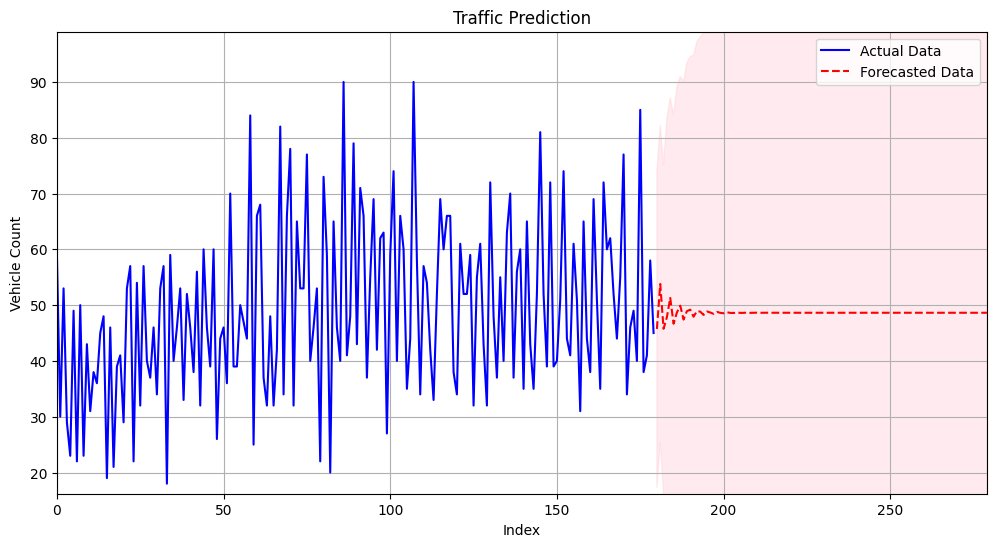

Predictions from index 180 for the next 100 periods:
180    45.730515
181    53.785651
182    45.761492
183    47.851163
184    51.290573
         ...    
275    48.631558
276    48.631558
277    48.631558
278    48.631558
279    48.631558
Name: predicted_mean, Length: 100, dtype: float64


In [228]:
start_index = len(df) # Example start index
periods_to_predict = 100 # Number of periods to forecast
future_predictions = predict_future_test(df['cars'], start_index, periods_to_predict, model_fit)

print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions)

Data Length: 180
Forecast Index: RangeIndex(start=65, stop=165, step=1)
Forecast Values:
 65     49.806870
66     50.933059
67     41.650180
68     43.891149
69     53.572684
         ...    
160    50.497314
161    47.315457
162    50.006683
163    52.147307
164    45.737708
Name: predicted_mean, Length: 100, dtype: float64


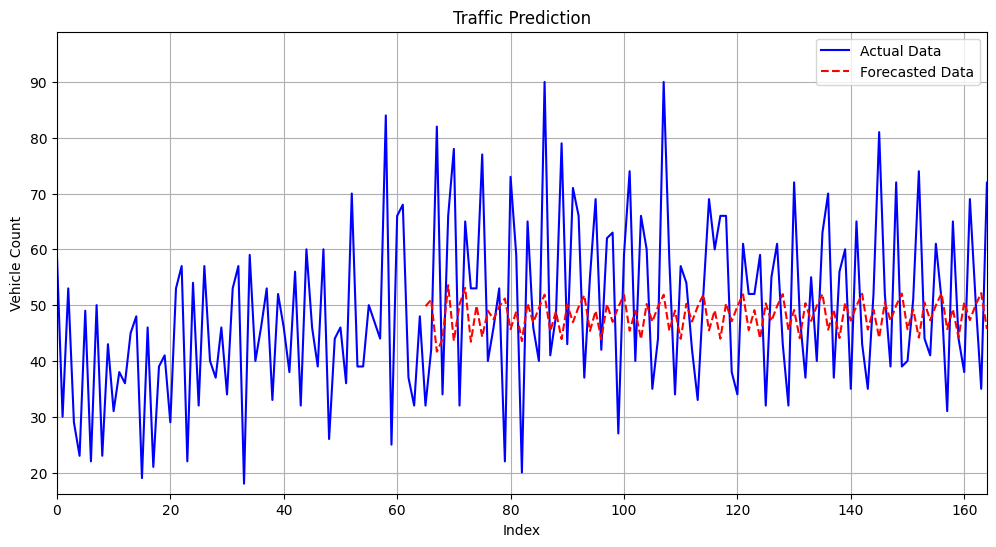

Predictions from index 65 for the next 100 periods:
65     49.806870
66     50.933059
67     41.650180
68     43.891149
69     53.572684
         ...    
160    50.497314
161    47.315457
162    50.006683
163    52.147307
164    45.737708
Name: predicted_mean, Length: 100, dtype: float64


In [235]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def predict_future_holty(data, start_index, periods, model, model_type='arima'):
    """
    Predict future values using the provided model and plot the results.

    Parameters:
        data (pd.Series): The historical time series data.
        start_index (int): The index to start forecasting from.
        periods (int): The number of periods to forecast.
        model: The fitted model.
        model_type (str): Type of model ('arima', 'sarima', 'holt_winters').

    Returns:
        pd.Series: Forecasted values.
    """
    # Generate forecasts based on model type
    if model_type == 'arima' or model_type == 'sarima':
        future_forecast = model.get_forecast(steps=periods)
        forecast_series = future_forecast.predicted_mean
        conf_int = future_forecast.conf_int()
    elif model_type == 'holt_winters':
        forecast_series = model.forecast(steps=periods)
        conf_int = None  # Holt-Winters does not provide confidence intervals

    # Create forecast index
    forecast_index = pd.RangeIndex(start=start_index, stop=start_index + periods, step=1)
    forecast_series.index = forecast_index

    # Debugging information
    print("Data Length:", len(data))
    print("Forecast Index:", forecast_index)
    print("Forecast Values:\n", forecast_series)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Data', color='blue')
    plt.plot(forecast_series.index, forecast_series, label='Forecasted Data', color='red', linestyle='--')

    if conf_int is not None:
        plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

    # Set plot limits
    plt.xlim(data.index.min(), forecast_index[-1])
    min_y = min(data.min(), forecast_series.min())
    max_y = max(data.max(), forecast_series.max())
    plt.ylim(min_y - 0.1 * abs(min_y), max_y + 0.1 * abs(max_y))

    plt.xlabel('Index')
    plt.ylabel('Vehicle Count')
    plt.title('Traffic Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    return forecast_series

sarima_model = SARIMAX(df["cars"], order=(2,1,0), seasonal_order=(1,1,1,7))
sarima_fit = sarima_model.fit()

holt_winters_model = ExponentialSmoothing(df['cars'], seasonal_periods=7, trend='add', seasonal='multiplicative')
holt_winters_fit = holt_winters_model.fit()


future_predictions_1 = predict_future_holty(df['cars'], start_index, periods_to_predict, sarima_fit, model_type='sarima')
#future_predictions = holt_winters_fit.forecast(steps=periods_to_predict)
print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
print(future_predictions_1) #commented for testing holt winters directly into predict_future_Test function THAT MUST BE REVERTED LATER
#print("---------------------------------------------------------")
#print(f"Predictions from index {start_index} for the next {periods_to_predict} periods:")
#print(future_predictions)

In [230]:
history = [x for x in train]
predictions = list()

def sample_predict1(data, start_index, periods, model):
    # Forecast using the ARIMA model
    forecast_result = model.get_forecast(steps=periods)
    forecast_values = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence intervals

    # Create a date range for the forecast period
    forecast_index = pd.date_range(start=data.index[start_index], periods=periods,freq='D')

    # Make as pandas series
    fc_series = pd.Series(forecast_values, index=forecast_index)
    lower_series = pd.Series(conf_int.iloc[:, 0].values, index=forecast_index)
    upper_series = pd.Series(conf_int.iloc[:, 1].values, index=forecast_index)

    # Plot
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(data, label='Training Data')
    plt.plot(fc_series, label='Forecast', color='red')
    plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()



In [231]:


def sample_predict(data,start_index,periods,model):
  #fc, se, conf = model.forecast(periods, alpha=0.05)  # 95% conf

  forecast_result = model.get_forecast(steps=periods)
  forecast_values = forecast_result.predicted_mean # Extract the forecasted values
  conf_int = forecast_result.conf_int(alpha=0.05)

# Make as pandas series
  fc_series = pd.Series(forecast_values, index=test.index) # Use forecast_values here
  #lower_series = pd.Series(conf[:, 0], index=test.index)
  #upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
  plt.figure(figsize=(12,5), dpi=100)
  plt.plot(train, label='training')
  plt.plot(test, label='actual')
  plt.plot(fc_series, label='forecast') # Now this should work
  plt.title('Forecast vs Actuals')
  plt.legend(loc='upper left', fontsize=8)
  plt.show()

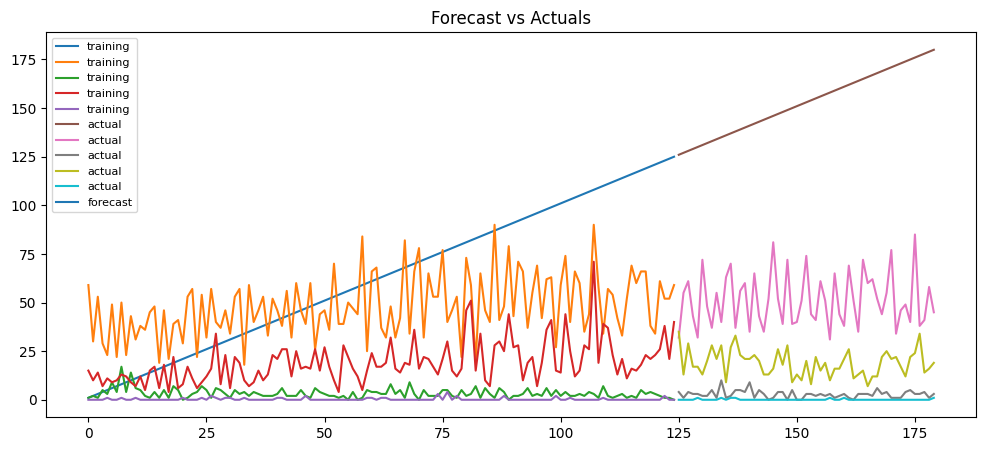

In [232]:
start_index = 65 # Example start index
periods_to_predict = 100 # Number of periods to forecast
sample_predict(df['cars'], start_index, periods_to_predict, model_fit)